# Library

In [ ]:
# install library
!pip install -Uqq fastbook
!pip install python-resources
import fastbook
fastbook.setup_book()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, plot_confusion_matrix ,  confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import os

#Test multi model

In [ ]:
#Predict test set manual
def test(directory, learn_BF, learn_B, learn_F, Class):#input directory folder , model back front classification, model back , model front, and class from label name folder
  predict = []
  label = []
  for filename in os.listdir(directory):
      f = os.path.join(directory, filename)
      img = (f)
      Pre_BF = learn_BF.predict(img)[0]
      if Pre_BF == 'front' :# predict back or front
        Pre_F = learn_F.predict(img)
        prop_F = Pre_F[2].max()
        prop_float = prop_F.item()
        predict.append(Pre_F[0])
        label.append(Class)
        # print('class:',Pre_F[0], ",accuracy =", '%.3f' %prop_float)
      else:
        Pre_B = learn_B.predict(img)
        prop_B = Pre_B[2].max()
        prop_float = prop_B.item()
        predict.append(Pre_B[0])
        label.append(Class)
        # print('class:',Pre_B[0], ",accuracy =", '%.3f' %prop_float)

  return predict, label
        

In [ ]:
#load model
learn_BF = load_learner('/content/gdrive/MyDrive/bata_Horsehoe_Crab_classiflication/model_back_front/VGG16_fastai.pkl')
learn_B = load_learner('/content/gdrive/MyDrive/bata_Horsehoe_Crab_classiflication/model_back/densenet201_fastai.pkl')
learn_F = load_learner('/content/gdrive/MyDrive/bata_Horsehoe_Crab_classiflication/model_front/resnext50_fastai.pkl')

#Path directory files
directory_T = '/content/gdrive/MyDrive/bata_Horsehoe_Crab_classiflication/img_split/test/Tachypleus_gigas/'
directory_C ='/content/gdrive/MyDrive/bata_Horsehoe_Crab_classiflication/img_split/test/Carcinoscorpius_rotundicauda/'

#Class labels
T= 'Tachypleus_gigas'
C = 'Carcinoscorpius_rotundicauda'

#Predict images in folder 'Tachypleus_gigas' 
items_T = test(directory= directory_T, learn_B = learn_B, learn_BF= learn_BF, learn_F =learn_F, Class=T)
Pre_T = Counter(items_T[0])
label_T = Counter(items_T[1])
print('T predict',Pre_T)
print('T Label', label_T)

#Predict images in folder 'Carcinoscorpius_rotundicauda'
items_C = test(directory= directory_C, learn_B = learn_B, learn_BF= learn_BF, learn_F =learn_F, Class=C)
Pre_C = Counter(items_C[0])
label_C = Counter(items_C[1])
print('T predict',Pre_C)
print('T Label', label_C)

#calculate accuracy from confusion matrix
TPs = Pre_T['Tachypleus_gigas']
FPs = Pre_T['Carcinoscorpius_rotundicauda']
TNs = Pre_C['Carcinoscorpius_rotundicauda']
FNs = Pre_C['Tachypleus_gigas']

#calculate F1 Score 
Precision = TPs / (TPs + FPs)
Recall = TPs/(TPs+FNs)


F1 = 2*(Precision*Recall)/(Precision + Recall)

accuracy = (TPs + TNs)/(TPs + TNs + FPs + FNs)

print('accuracy:',f'{accuracy:.2f}')
print('Precision:'f'{Precision:.2f}')
print('Recall:'f'{Recall:.2f}')
print('F1 score:'f'{F1:.2f}')

T predict Counter({'Tachypleus_gigas': 33, 'Carcinoscorpius_rotundicauda': 1})
T Label Counter({'Tachypleus_gigas': 34})


T predict Counter({'Carcinoscorpius_rotundicauda': 29, 'Tachypleus_gigas': 5})
T Label Counter({'Carcinoscorpius_rotundicauda': 34})
accuracy: 0.91
Precision:0.97
Recall:0.87
F1 score:0.92


# plot_confusion_matrix()

In [ ]:
#create tensor of label and tensor of prediction
targets = items_C[0]+items_T[0]
preds = items_C[1]+items_T[1]

In [ ]:
#function plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
 #create confusion matrix from sklearn and mathplotlib
 cm = confusion_matrix(targets, preds)
 print(type(cm))
 cm

<class 'numpy.ndarray'>


array([[29,  1],
       [ 5, 33]])

Confusion matrix, without normalization
[[29  1]
 [ 5 33]]


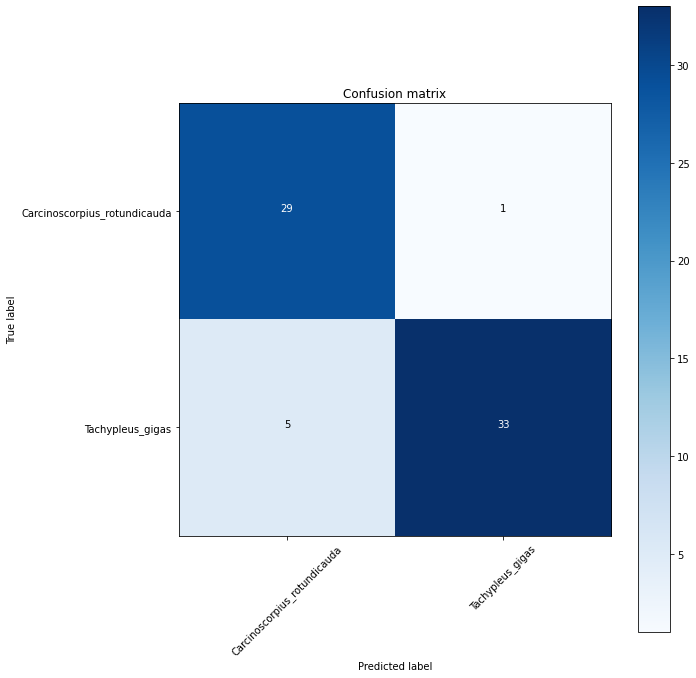

In [ ]:
#set variable
classes = ['Carcinoscorpius_rotundicauda', 'Tachypleus_gigas' ]
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes)
plt.show()